<a href="https://colab.research.google.com/github/devin-p-quinn/keyBERT/blob/main/keyBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keybert

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
# Read Moby Dick in as a single doc
with open("mobydick.txt", "r") as file:
  doc = file.read()

In [ ]:
# clean unnecessary trailing whitespace
# make all words lower case for better processing
doc = doc.strip()
doc = doc.lower()

In [ ]:
from keybert import KeyBERT
# Use the phrase-bert model trained for phrase detection
kw_model = KeyBERT()

In [ ]:
doc_embeddings, word_embeddings = kw_model.extract_embeddings(doc, keyphrase_ngram_range=(1,3))
keythemes = kw_model.extract_keywords(doc, doc_embeddings=doc_embeddings, word_embeddings=word_embeddings,\
                                     keyphrase_ngram_range=(1,3), top_n=10)

In [ ]:
keythemes

[('forswearing sea tempted', 0.5305),
 ('sea usages instinctive', 0.4956),
 ('sea tempted', 0.4735),
 ('honouring whalemen think', 0.4712),
 ('subtleness sea dreaded', 0.4683),
 ('seas wearily lonesomely', 0.464),
 ('sea tempted day', 0.4603),
 ('whaleman discretion', 0.4601),
 ('read fate whalemen', 0.4598),
 ('whaleman discretion certain', 0.455)]

In [ ]:
sentences = doc.split(".")

In [ ]:
kw_model = KeyBERT('whaleloops/phrase-bert')

In [ ]:
doc_embeddings, word_embeddings = kw_model.extract_embeddings(sentences, keyphrase_ngram_range=(3,7), stop_words=None)
keymessages = kw_model.extract_keywords(sentences, doc_embeddings=doc_embeddings, word_embeddings=word_embeddings,\
                                     keyphrase_ngram_range=(3,7), stop_words=None)

In [ ]:
# Evaluate number of occurences of key messages in Moby Dick text
key_val = {}

for items in keywords:
  for item in items:
    key_val[item[0]] = doc.count(item[0])

In [ ]:
keys = list(key_val.keys())
values = list(key_val.values())
sorted_value_index = np.argsort(values)
sorted_value_index = np.flip(sorted_value_index)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
sorted_dict

In [ ]:
short_sort = dict(itertools.islice(sorted_dict.items(), 20))

In [ ]:
short_sort

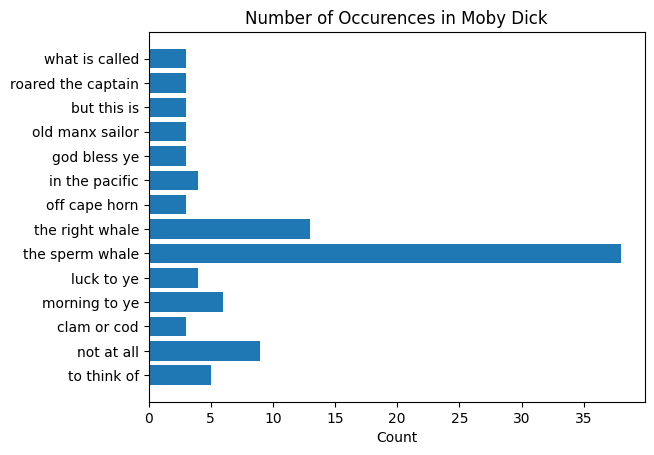

In [ ]:
phrases = list(short_sort.keys())
occurences = list(short_sort.values())

fig = plt.figure()

plt.barh(phrases, occurences, color='green')
plt.gca().invert_yaxis()



plt.xlabel("Number of Occurences")
plt.ylabel("Detected phrases")
plt.title("KeyBERT Analysis Results")

plt.show()